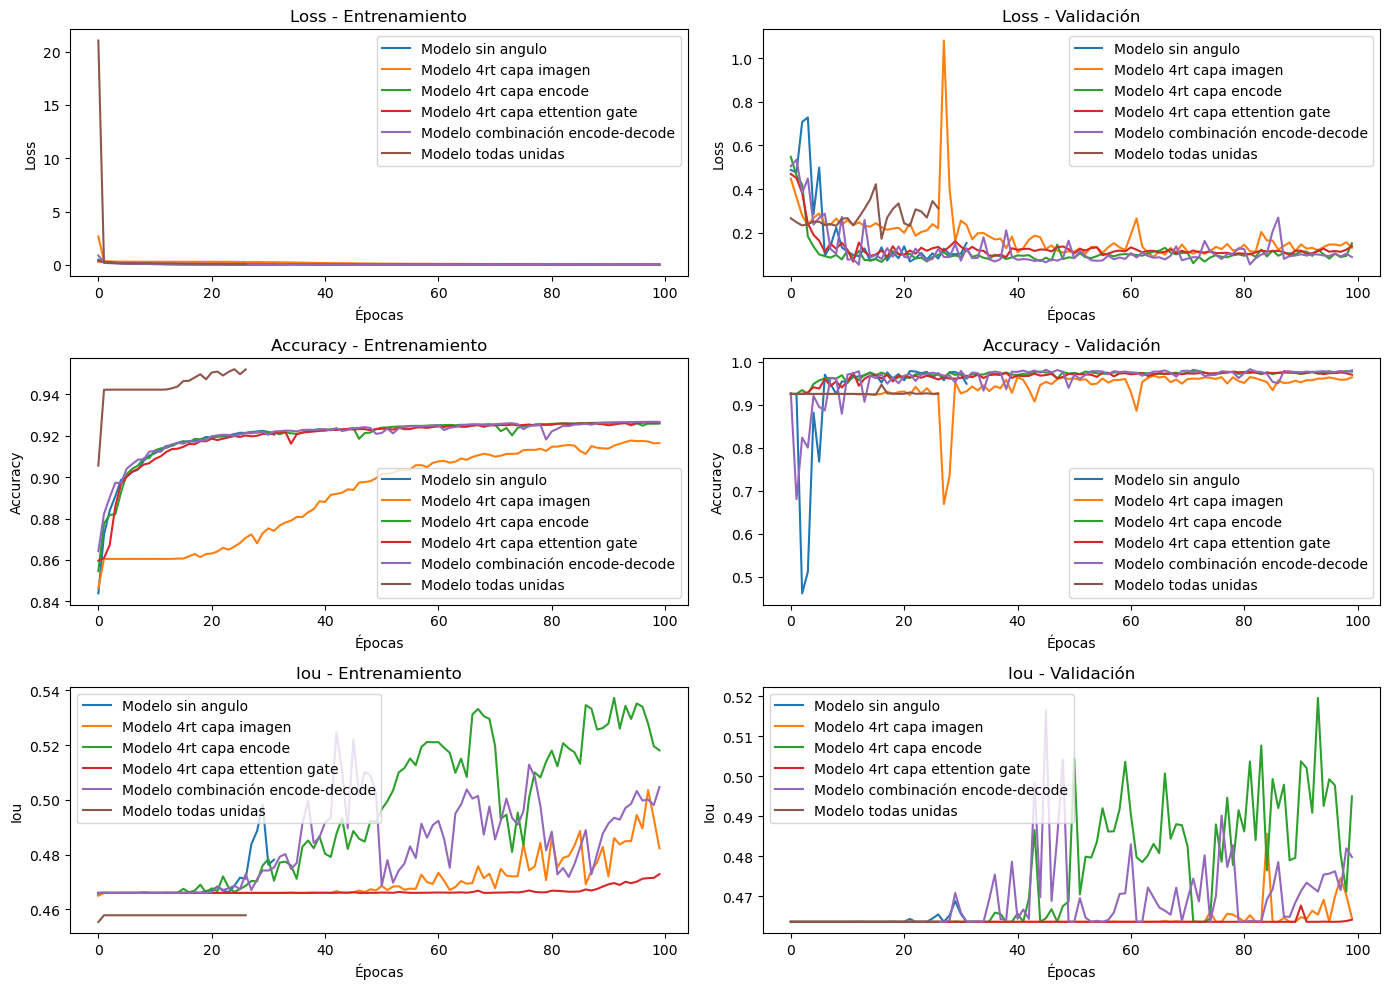

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los historiales de entrenamiento desde CSV
model_histories = {
    "Modelo sin angulo": pd.read_csv("training_history_sin_angulos.csv"),
    "Modelo 4rt capa imagen": pd.read_csv("training_history_angulo_4rt_capa.csv"),
    "Modelo 4rt capa encode": pd.read_csv("training_history_angulo_decode_capa_final.csv"),
    "Modelo 4rt capa ettention gate": pd.read_csv("training_history_angulo_attention_gate_4_decode.csv"),
    "Modelo combinación encode-decode": pd.read_csv("training_history_combinacion_encode_decode.csv"),
    "Modelo todas unidas": pd.read_csv("training_history-comb-all.csv")
}

# Definir las métricas para analizar
metrics = ["loss", "accuracy", "IoU"]
val_metrics = [f"val_{metric}" for metric in metrics]

# Graficar resultados de entrenamiento y validación
fig, axs = plt.subplots(len(metrics), 2, figsize=(14, 10))  # Una fila por métrica y dos columnas (entrenamiento/validación)

for i, metric in enumerate(metrics):
    for model_name, history in model_histories.items():
        # Graficar la métrica de entrenamiento
        axs[i, 0].plot(history[metric], label=model_name)
        axs[i, 0].set_title(f"{metric.capitalize()} - Entrenamiento")
        axs[i, 0].set_xlabel("Épocas")
        axs[i, 0].set_ylabel(metric.capitalize())
        axs[i, 0].legend()
        
        # Graficar la métrica de validación
        axs[i, 1].plot(history[val_metrics[i]], label=model_name)
        axs[i, 1].set_title(f"{metric.capitalize()} - Validación")
        axs[i, 1].set_xlabel("Épocas")
        axs[i, 1].set_ylabel(metric.capitalize())
        axs[i, 1].legend()

plt.tight_layout()
plt.show()


                             Modelo  Mejor Loss (Entrenamiento)  \
0                 Modelo sin angulo                    0.036576   
1            Modelo 4rt capa imagen                    0.052474   
2            Modelo 4rt capa encode                    0.020511   
3    Modelo 4rt capa ettention gate                    0.020042   
4  Modelo combinación encode-decode                    0.018566   
5               Modelo todas unidas                    0.101090   

   Mejor Loss (Validación)  Mejor Accuracy (Entrenamiento)  \
0                 0.068235                        0.922428   
1                 0.089481                        0.917740   
2                 0.060653                        0.926374   
3                 0.067824                        0.926440   
4                 0.053823                        0.926822   
5                 0.172268                        0.952213   

   Mejor Accuracy (Validación)  Mejor IoU (Entrenamiento)  \
0                     0.978457    

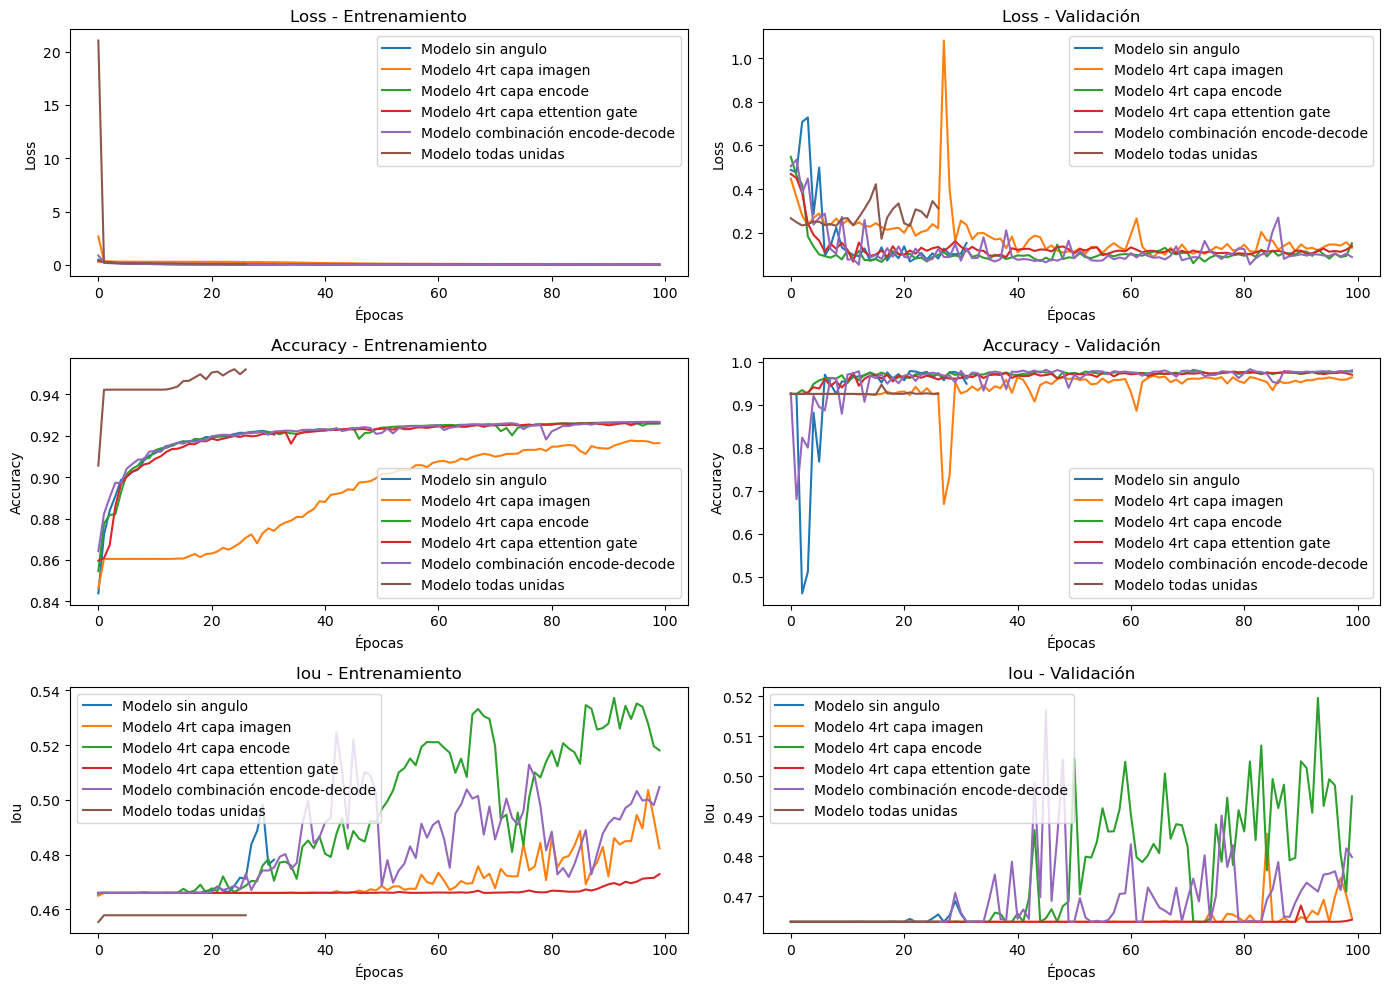

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Definir las métricas para analizar
metrics = ["loss", "accuracy", "IoU"]
val_metrics = [f"val_{metric}" for metric in metrics]

# Almacenar los mejores resultados para cada métrica y modelo
best_results = []

for model_name, history in model_histories.items():
    # Obtener los mejores valores de entrenamiento y validación para cada métrica
    best_loss = history["loss"].min()
    best_val_loss = history["val_loss"].min()
    
    best_accuracy = history["accuracy"].max()
    best_val_accuracy = history["val_accuracy"].max()
    
    best_iou = history["IoU"].max()
    best_val_iou = history["val_IoU"].max()
    
    # Agregar los resultados en una lista de diccionarios
    best_results.append({
        "Modelo": model_name,
        "Mejor Loss (Entrenamiento)": best_loss,
        "Mejor Loss (Validación)": best_val_loss,
        "Mejor Accuracy (Entrenamiento)": best_accuracy,
        "Mejor Accuracy (Validación)": best_val_accuracy,
        "Mejor IoU (Entrenamiento)": best_iou,
        "Mejor IoU (Validación)": best_val_iou
    })

# Convertir los mejores resultados en un DataFrame
best_results_df = pd.DataFrame(best_results)

# Mostrar la tabla de mejores resultados
print(best_results_df)

# Graficar los resultados de entrenamiento y validación
fig, axs = plt.subplots(len(metrics), 2, figsize=(14, 10))  # Una fila por métrica y dos columnas (entrenamiento/validación)

for i, metric in enumerate(metrics):
    for model_name, history in model_histories.items():
        # Graficar la métrica de entrenamiento
        axs[i, 0].plot(history[metric], label=model_name)
        axs[i, 0].set_title(f"{metric.capitalize()} - Entrenamiento")
        axs[i, 0].set_xlabel("Épocas")
        axs[i, 0].set_ylabel(metric.capitalize())
        axs[i, 0].legend()
        
        # Graficar la métrica de validación
        axs[i, 1].plot(history[val_metrics[i]], label=model_name)
        axs[i, 1].set_title(f"{metric.capitalize()} - Validación")
        axs[i, 1].set_xlabel("Épocas")
        axs[i, 1].set_ylabel(metric.capitalize())
        axs[i, 1].legend()

plt.tight_layout()
plt.show()
